In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Fabricio Paez - 2020

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#metrics">Metrics Theory</a></li>
<li><a href="#overview">Overview</a></li>
<li><a href="#agg">Aggregation into categories</a></li>
<li><a href="#case">Case Study</a></li>
<li><a href="#viz">Visualization</a></li>
</ul>

<a id='intro'></a>
## **What Is Market Basket Analysis?**

Market Basket Analysis is a technique which identifies the strength of association between pairs of products purchased together and identify patterns of co-occurrence. A co-occurrence is when two or more things take place together.

1. Identify products frequently purchased together

2. Construct recommendations based on these fundings

**Uses of Market Basket Analysis:**

1. Build Netflix stlye recommendations engine
2. Improve Product recommendations on an e-commerce store
3. Cross-ssell products in retail
4. Upselling

**Association rules**

If-then relationship:

    -{antecedent} --> {consequent}
    
**Multi-antecedent rule:**

    -{humor,travel} --> {language}

**Multi-consequent rule:**

    -{biography} --> {history,language}

In [2]:
df=pd.read_csv('bookstore_transactions.csv')
df

,Transaction
0,"History,Bookmark"
1,"History,Bookmark"
2,"Fiction,Bookmark"
3,"Biography,Bookmark"
4,"History,Bookmark"
...,...
94,"Biography,Bookmark"
95,"Poetry,Bookmark"
96,"History,Bookmark"
97,"Biography,Bookmark"


## Data Wrangling

In [4]:
#split transaction strings into lists
trans=df['Transaction'].apply(lambda x:x.split(','))
trans

0       [History, Bookmark]
1       [History, Bookmark]
2       [Fiction, Bookmark]
3     [Biography, Bookmark]
4       [History, Bookmark]
              ...          
94    [Biography, Bookmark]
95       [Poetry, Bookmark]
96      [History, Bookmark]
97    [Biography, Bookmark]
98    [Biography, Bookmark]
Name: Transaction, Length: 99, dtype: object

In [5]:
# Convert DataFrame column into list of strings
trans= list(trans)

In [6]:
trans

[['History', 'Bookmark'],
 ['History', 'Bookmark'],
 ['Fiction', 'Bookmark'],
 ['Biography', 'Bookmark'],
 ['History', 'Bookmark'],
 ['Poetry', 'Bookmark'],
 ['Biography', 'Bookmark'],
 ['Poetry', 'Bookmark'],
 ['Biography', 'Bookmark'],
 ['Biography', 'Bookmark'],
 ['History', 'Bookmark'],
 ['Fiction', 'Bookmark'],
 ['History', 'Bookmark'],
 ['Biography', 'Bookmark'],
 ['Poetry', 'Bookmark'],
 ['Biography', 'Bookmark'],
 ['Fiction', 'Bookmark'],
 ['Biography', 'Bookmark'],
 ['Poetry', 'Bookmark'],
 ['History', 'Bookmark'],
 ['History', 'Bookmark'],
 ['Poetry', 'Bookmark'],
 ['Fiction', 'Bookmark'],
 ['History', 'Bookmark'],
 ['Biography', 'Bookmark'],
 ['Biography', 'Bookmark'],
 ['Fiction', 'Bookmark'],
 ['Biography', 'Bookmark'],
 ['History', 'Bookmark'],
 ['Fiction', 'Bookmark'],
 ['History', 'Bookmark'],
 ['History', 'Bookmark'],
 ['Biography', 'Bookmark'],
 ['Biography', 'Bookmark'],
 ['History', 'Bookmark'],
 ['History', 'Bookmark'],
 ['Biography', 'Bookmark'],
 ['Biography', 'B

In [23]:
gaa= [item for transaction in trans for item in transaction]
gaa

['History',
 'Bookmark',
 'History',
 'Bookmark',
 'Fiction',
 'Bookmark',
 'Biography',
 'Bookmark',
 'History',
 'Bookmark',
 'Poetry',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Poetry',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Biography',
 'Bookmark',
 'History',
 'Bookmark',
 'Fiction',
 'Bookmark',
 'History',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Poetry',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Fiction',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Poetry',
 'Bookmark',
 'History',
 'Bookmark',
 'History',
 'Bookmark',
 'Poetry',
 'Bookmark',
 'Fiction',
 'Bookmark',
 'History',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Fiction',
 'Bookmark',
 'Biography',
 'Bookmark',
 'History',
 'Bookmark',
 'Fiction',
 'Bookmark',
 'History',
 'Bookmark',
 'History',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Biography',
 'Bookmark',
 'History',
 'Bookmark',
 'History',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Fiction',
 'Bookmark',
 '

In [25]:
#remembering list comprehension logic:
test=[]
for x in trans:
    for item in x:
        test.append(item)

test

['History',
 'Bookmark',
 'History',
 'Bookmark',
 'Fiction',
 'Bookmark',
 'Biography',
 'Bookmark',
 'History',
 'Bookmark',
 'Poetry',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Poetry',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Biography',
 'Bookmark',
 'History',
 'Bookmark',
 'Fiction',
 'Bookmark',
 'History',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Poetry',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Fiction',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Poetry',
 'Bookmark',
 'History',
 'Bookmark',
 'History',
 'Bookmark',
 'Poetry',
 'Bookmark',
 'Fiction',
 'Bookmark',
 'History',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Fiction',
 'Bookmark',
 'Biography',
 'Bookmark',
 'History',
 'Bookmark',
 'Fiction',
 'Bookmark',
 'History',
 'Bookmark',
 'History',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Biography',
 'Bookmark',
 'History',
 'Bookmark',
 'History',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Biography',
 'Bookmark',
 'Fiction',
 'Bookmark',
 '

In [29]:
from itertools import permutations
items= list(set(gaa))
items

['Poetry', 'Fiction', 'Biography', 'Bookmark', 'History']

In [33]:
#compute and print rules:
rules=list(permutations(items,2))
rules

[('Poetry', 'Fiction'),
 ('Poetry', 'Biography'),
 ('Poetry', 'Bookmark'),
 ('Poetry', 'History'),
 ('Fiction', 'Poetry'),
 ('Fiction', 'Biography'),
 ('Fiction', 'Bookmark'),
 ('Fiction', 'History'),
 ('Biography', 'Poetry'),
 ('Biography', 'Fiction'),
 ('Biography', 'Bookmark'),
 ('Biography', 'History'),
 ('Bookmark', 'Poetry'),
 ('Bookmark', 'Fiction'),
 ('Bookmark', 'Biography'),
 ('Bookmark', 'History'),
 ('History', 'Poetry'),
 ('History', 'Fiction'),
 ('History', 'Biography'),
 ('History', 'Bookmark')]

In [2]:
groceries_path='https://assets.datacamp.com/production/repositories/5654/datasets/5992818fd324b0de7d48311ee43fa038f7614ee5/small_grocery_store.csv'

In [3]:
groceries=pd.read_csv(groceries_path)
groceries.head()

,Transaction
0,"milk,bread,biscuit"
1,"bread,milk,biscuit,cereal"
2,"bread,tea"
3,"jam,bread,milk"
4,"tea,biscuit"


In [4]:
transactions= groceries['Transaction'].apply(lambda x: x.split(','))

In [5]:
transactions=list(transactions)

In [6]:
transactions

[['milk', 'bread', 'biscuit'],
 ['bread', 'milk', 'biscuit', 'cereal'],
 ['bread', 'tea'],
 ['jam', 'bread', 'milk'],
 ['tea', 'biscuit'],
 ['bread', 'tea'],
 ['tea', 'cereal'],
 ['bread', 'tea', 'biscuit'],
 ['jam', 'bread', 'tea'],
 ['bread', 'milk'],
 ['coffee', 'orange', 'biscuit', 'cereal'],
 ['coffee', 'orange', 'biscuit', 'cereal'],
 ['coffee', 'sugar'],
 ['bread', 'coffee', 'orange'],
 ['bread', 'sugar', 'biscuit'],
 ['coffee', 'sugar', 'cereal'],
 ['bread', 'sugar', 'biscuit'],
 ['bread', 'coffee', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['tea', 'milk', 'coffee', 'cereal']]

In [7]:
from itertools import permutations

# Define the set of groceries
flattened= [i for x in transactions for i in x]
groceries= list(set(flattened))

#Generate all possible rules
rules = list(permutations(groceries, 2))
print(rules)

print(len(rules))

[('cereal', 'milk'), ('cereal', 'sugar'), ('cereal', 'tea'), ('cereal', 'bread'), ('cereal', 'biscuit'), ('cereal', 'coffee'), ('cereal', 'orange'), ('cereal', 'jam'), ('milk', 'cereal'), ('milk', 'sugar'), ('milk', 'tea'), ('milk', 'bread'), ('milk', 'biscuit'), ('milk', 'coffee'), ('milk', 'orange'), ('milk', 'jam'), ('sugar', 'cereal'), ('sugar', 'milk'), ('sugar', 'tea'), ('sugar', 'bread'), ('sugar', 'biscuit'), ('sugar', 'coffee'), ('sugar', 'orange'), ('sugar', 'jam'), ('tea', 'cereal'), ('tea', 'milk'), ('tea', 'sugar'), ('tea', 'bread'), ('tea', 'biscuit'), ('tea', 'coffee'), ('tea', 'orange'), ('tea', 'jam'), ('bread', 'cereal'), ('bread', 'milk'), ('bread', 'sugar'), ('bread', 'tea'), ('bread', 'biscuit'), ('bread', 'coffee'), ('bread', 'orange'), ('bread', 'jam'), ('biscuit', 'cereal'), ('biscuit', 'milk'), ('biscuit', 'sugar'), ('biscuit', 'tea'), ('biscuit', 'bread'), ('biscuit', 'coffee'), ('biscuit', 'orange'), ('biscuit', 'jam'), ('coffee', 'cereal'), ('coffee', 'milk'

<a id='metrics'></a>
## The simplest metric, Support:

support metric= number of transactions with item / number of transactions

example= number of transactions with milk/ total transactions

In [8]:
print(groceries)
print(len(groceries))

['cereal', 'milk', 'sugar', 'tea', 'bread', 'biscuit', 'coffee', 'orange', 'jam']
9


In [9]:
len(transactions)

20

In [10]:
from mlxtend.preprocessing import TransactionEncoder

In [11]:
#Initiate transaction encoder
encoder=TransactionEncoder().fit(transactions)

In [12]:
#One hot encode itemsets by applying fit and transform

onehot=encoder.transform(transactions)

In [13]:
onehot.shape

(20, 9)

In [14]:
#Each column in one hot correspond to one of the nine items in our dataset
#If the item is present in a transaction, this is encoded as TRUE
onehot

array([[ True,  True, False, False, False,  True, False, False, False],
       [ True,  True,  True, False, False,  True, False, False, False],
       [False,  True, False, False, False, False, False, False,  True],
       [False,  True, False, False,  True,  True, False, False, False],
       [ True, False, False, False, False, False, False, False,  True],
       [False,  True, False, False, False, False, False, False,  True],
       [False, False,  True, False, False, False, False, False,  True],
       [ True,  True, False, False, False, False, False, False,  True],
       [False,  True, False, False,  True, False, False, False,  True],
       [False,  True, False, False, False,  True, False, False, False],
       [ True, False,  True,  True, False, False,  True, False, False],
       [ True, False,  True,  True, False, False,  True, False, False],
       [False, False, False,  True, False, False, False,  True, False],
       [False,  True, False,  True, False, False,  True, False, 

In [15]:
#Convert one-hot encoded data to a DataFrame
onehot= pd.DataFrame(onehot,columns=encoder.columns_)
onehot

,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea
0,True,True,False,False,False,True,False,False,False
1,True,True,True,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,True
3,False,True,False,False,True,True,False,False,False
4,True,False,False,False,False,False,False,False,True
5,False,True,False,False,False,False,False,False,True
6,False,False,True,False,False,False,False,False,True
7,True,True,False,False,False,False,False,False,True
8,False,True,False,False,True,False,False,False,True
9,False,True,False,False,False,True,False,False,False


In [16]:
onehot.mean().sort_values(ascending=False)

bread      0.65
coffee     0.40
biscuit    0.40
tea        0.35
sugar      0.30
cereal     0.30
milk       0.25
orange     0.15
jam        0.10
dtype: float64

## Computing support for multiple items

In [17]:
np.logical_and(onehot['bread'],onehot['coffee']).mean()

0.15

In [18]:
np.where(onehot['bread']& onehot['coffee'],True,False).mean()

0.15

In [19]:
onehot['bread+coffee']=np.where(onehot['bread']& onehot['coffee'],True,False)

In [20]:
onehot['cereal+milk']=np.where(onehot['cereal']& onehot['milk'],True,False)

In [21]:
onehot.mean()

biscuit         0.40
bread           0.65
cereal          0.30
coffee          0.40
jam             0.10
milk            0.25
orange          0.15
sugar           0.30
tea             0.35
bread+coffee    0.15
cereal+milk     0.10
dtype: float64


## Confidence and lift

A support based rule would might tell us: "if milk then bread", intuitevely we know that this rule isn't informative for the purpose of corss selling and mkt,**the association arises from both milk and bread being independently popular items.** 

We can improve over support through the use of additional metrics:

>Confidence: **Support (X&Y) / Support(X)**, probability that we'll purchase Y, given that we have purchased X.  **P(Y|X)**

Another metric:

>Lift: **Support (X&Y) / Support(X) * Support(Y)**. A lift value of greater than 1 tells us that two items occur in transactions together more often tan we would expect based on their individual support values. *This could give us some confidence that the association rule we recommended did not arise by random chance.*

## Leverage and conviction

More complicated metrics in MB analysis tend to build on simpler one. To remember:

**$Support(X)$ = $Frequency(X)$  /  $N$**

**$Support(X->Y)$ = $Frequency$ (X&Y)  /  $N$**

**$Confidence(X->Y)$ = $Support$ (X->Y)  /  $Support$ (X)**

**$Lift(X->Y)$ = $Support$ (X->Y)  /  $Support$ (X) * $Support$ (Y)**

In [22]:
def support(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    return supportAC

In [24]:
support(onehot.cereal, onehot.milk)

0.1

In [25]:
def confidence(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Return conviction
    return supportAC/supportA

In [26]:
confidence(onehot.cereal, onehot.milk)

0.33333333333333337

In [27]:
confidence(onehot.milk,onehot.cereal)

0.4

In [28]:
def lift(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()
    
    # Compute support for consequent
    supportC = consequent.mean()

    # Return conviction
    return supportAC/(supportA*supportC)

In [29]:
lift(onehot.cereal, onehot.milk)

1.3333333333333335

Leverage is also build on **support**


**$Leverage(X->Y)$ = $Support$ (X->Y)  - ($Support$ (X) * $Support$ (Y))**

Lift and average are similar:

>One advantage of using leverage is that lies in -1 and +1 range, easy to identify high and low values

>Lift ranges from 0 to infinity

Conviction is built also using support, but its more complicated and less intuitive than leverage:


**$Conviction(X->Y)$ = ($Support$ (X) * $Support$ (NOT Y)) / $Support$ (X->NOT Y)**

The ratio must be >1 to suggest the rule as viable.



In [30]:
def conviction(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()

    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return supportA * supportnC / supportAnC

In [31]:
conviction(onehot.cereal, onehot.milk)

1.125

In [32]:
conviction(onehot.milk, onehot.cereal)

1.1666666666666667

## Association and Dissociation

What if buying one item predicts that an individual will not read another?

 There's one metric that captures both association and dissociation: **Zhang**
 
 Takes values between -1 and +1, where 1 indicates perfect association and -1 perfect dissociation


$$
Zhang(X->Y) =
\frac{Confidence(X->Y)  -  Confidence(notX->Y)}{Max(Confidence(X->Y) , Confidence(notX->Y) )} \\
$$

$$
Confidence(X->Y)= 
\frac{Support (X->Y)}{Support (X)} \\
$$

Also it can be developed using only support:

$$
\frac{Support(XY)  -  Support(X)Support(Y)}{Max[Support(XY)*(1-Support(X)),\
Support(X)*(Support(Y)-Support(XY))]} \\
$$

In [2]:
def zhang(antecedent, consequent):

    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()
    
    # Compute support for consequent
    supportC = consequent.mean()

    # Compute numerator
    numerator = supportAC - supportA*supportC

    # Compute denominator
    denominator = max(supportAC*(1-supportA),supportA*(supportC-supportAC))

    # Compute and print Zhang's metric
    zhang = numerator / denominator
    
    return zhang

In [34]:
zhang(onehot.cereal, onehot.milk)

0.3571428571428573

In [35]:
itemsets=pd.DataFrame(rules,columns=['antecedent','consequent'])

In [36]:
# Define an empty list for Zhang's metric
zhangs_metric = []

# Loop over lists in itemsets
for itemset in rules:
    # Extract the antecedent and consequent columns
    antecedent = onehot[itemset[0]]
    consequent = onehot[itemset[1]]
    
    # Complete Zhang's metric and append it to the list
    zhangs_metric.append(zhang(antecedent, consequent))
    
# Print results
itemsets['zhang'] = zhangs_metric

In [48]:
itemsets.sort_values(by='zhang',ascending=False).head(10)

,antecedent,consequent,zhang
39,bread,jam,1.000000
54,coffee,orange,1.000000
6,cereal,orange,0.785714
62,orange,coffee,0.705882
46,biscuit,orange,0.666667
48,coffee,cereal,0.666667
50,coffee,sugar,0.666667
15,milk,jam,0.666667
56,orange,cereal,0.647059
21,sugar,coffee,0.571429


In [38]:
support(onehot.coffee,onehot.orange)

0.15

In [39]:
confidence(onehot.coffee,onehot.orange)

0.37499999999999994

In [40]:
confidence(onehot.orange,onehot.coffee)

1.0

In [41]:
lift(onehot.coffee,onehot.orange)

2.5

In [42]:
conviction(onehot.coffee,onehot.orange)

1.36

In [43]:
conviction(onehot.orange,onehot.coffee)

<ipython-input-30-e6dfd18b1d75>:15: RuntimeWarning: divide by zero encountered in double_scalars
  return supportA * supportnC / supportAnC


inf

In [44]:
zhang(onehot.coffee, onehot.orange)

1.0

In [45]:
zhang(onehot.orange, onehot.coffee)

0.7058823529411764

<a id='overview'></a>
## Overview of Market Basket Analysis

The standard procedure for market basket analysis:

1. Generate large set of rules
2. Filter rules using metrics (pruning)
    - We must apply a initial round of filtering, often using support
3. Apply business intuition and common sense

In [3]:
#load novelty gift data
gifts=pd.read_csv('online_retail.csv')
gifts.sample(10)

,InvoiceNo,StockCode,Description
201980,579777,23551,PACK OF 12 PAISLEY PARK TISSUES
120307,573380,23127,FELTCRAFT GIRL NICOLE KIT
180865,578149,21912,VINTAGE SNAKES & LADDERS
160210,576617,22989,SET 2 PANTRY DESIGN TEA TOWELS
142314,575177,22580,ADVENT CALENDAR GINGHAM SACK
54639,567864,22907,PACK OF 20 NAPKINS PANTRY DESIGN
182947,578281,22942,CHRISTMAS LIGHTS 10 SANTAS
46372,567111,22694,WICKER STAR
135399,574702,21136,PAINTED METAL PEARS ASSORTED
128628,574091,23581,JUMBO BAG PAISLEY PARK


In [4]:
#number of transactions
gifts.InvoiceNo.nunique()

9709

In [5]:
#number of codes
gifts.StockCode.nunique()

3353

In [6]:
#number of items
gifts.Description.nunique()

3460

In [7]:
gifts['InvoiceNo'] = gifts['InvoiceNo'].astype('str')

In [8]:
gift_market_basket = gifts.groupby(['InvoiceNo', 'Description'])['Description']

In [9]:
gift_market_basket.count()

InvoiceNo  Description                     
549687     60 TEATIME FAIRY CAKE CASES         1
           72 SWEETHEART FAIRY CAKE CASES      1
           DOORMAT MULTICOLOUR STRIPE          1
           DOORMAT RED RETROSPOT               1
           DOORMAT WELCOME SUNRISE             1
                                              ..
C581490    ZINC T-LIGHT HOLDER STARS SMALL     1
C581499    Manual                              1
C581568    VICTORIAN SEWING BOX LARGE          1
C581569    36 PENCILS TUBE RED RETROSPOT       1
           HANGING HEART JAR T-LIGHT HOLDER    1
Name: Description, Length: 221366, dtype: int64

In [10]:
gift_market_basket=gift_market_basket.count().unstack().fillna(0)

**hot encode the data and get 1 transaction per row to prepare to run our mlxtend analysis.**

In [11]:
gift_market_basket

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,wet boxes,wet pallet,wet rusty,wet?,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
549687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
552695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

In [13]:
gift_market_basket=gift_market_basket.applymap(encode_data)

In [14]:
#support
gift_market_basket.mean()

Description
 4 PURPLE FLOCK DINNER CANDLES    0.002459
 50'S CHRISTMAS GIFT BAG LARGE    0.012723
 DOLLY GIRL BEAKER                0.013258
 I LOVE LONDON MINI BACKPACK      0.007698
 NINE DRAWER OFFICE TIDY          0.002994
                                    ...   
wrongly coded 23343               0.000107
wrongly coded-23343               0.000107
wrongly marked                    0.000107
wrongly marked 23343              0.000107
wrongly marked carton 22804       0.000107
Length: 3460, dtype: float64

In [15]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [18]:
itemsets = apriori(gift_market_basket, min_support=0.03, use_colnames=True)

In [19]:
rules = association_rules(itemsets, metric="lift", min_threshold=1)

In [21]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.046402,0.050144,0.033038,0.711982,14.198643,0.030711,3.297899
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.050144,0.046402,0.033038,0.658849,14.198643,0.030711,2.795233
2,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE TEA AND SYMPATHY),0.056987,0.056559,0.030258,0.530957,9.387598,0.027035,2.011415
3,(HOT WATER BOTTLE TEA AND SYMPATHY),(CHOCOLATE HOT WATER BOTTLE),0.056559,0.056987,0.030258,0.534972,9.387598,0.027035,2.027861
4,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.062547,0.051748,0.036138,0.577778,11.165197,0.032901,2.245860
5,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.051748,0.062547,0.036138,0.698347,11.165197,0.032901,3.107722
6,(JUMBO BAG 50'S CHRISTMAS ),(JUMBO BAG VINTAGE CHRISTMAS ),0.066717,0.047044,0.031755,0.475962,10.117428,0.028616,1.818485
7,(JUMBO BAG VINTAGE CHRISTMAS ),(JUMBO BAG 50'S CHRISTMAS ),0.047044,0.066717,0.031755,0.675000,10.117428,0.028616,2.871641
8,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.084999,0.045975,0.030685,0.361006,7.852307,0.026778,1.493012
9,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.045975,0.084999,0.030685,0.667442,7.852307,0.026778,2.751400


<a id='agg'></a>
# Aggregation

Aggregation groups items together into categories or aggregates. This reduces the mba problem to the identification of rules between categories of items

The task is to to perform aggregation for all *signs* in the dataset and also compute the support for this category. 

In [16]:
gift_market_basket

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,wet boxes,wet pallet,wet rusty,wet?,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
549687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550644,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
552695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
553857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
557499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Select the column headers for sign items
sign_headers = [i for i in gift_market_basket.columns if i.lower().find('sign')>=0]

# Select columns of sign items
sign_columns = gift_market_basket[sign_headers]

# Perform aggregation of sign items into sign category
signs = sign_columns.sum(axis = 1) >= 1.0

# Print support for signs
print(f'Share of Signs: {round(signs.mean(),2)}')

Share of Signs: 0.46


Let's define a function

In [19]:
def aggregate(encoded_dataset,item):
    # Select the column headers for sign items
    item_headers = [i for i in encoded_dataset.columns if i.lower().find(item)>=0]

    # Select columns of sign items
    item_columns = encoded_dataset[item_headers]

    # Return category of aggregated items
    return item_columns.sum(axis = 1) >= 1.0

# Aggregate items for the bags, boxes, and candles categories  
bags = aggregate(gift_market_basket,'bag')
boxes = aggregate(gift_market_basket,'boxes')
candles = aggregate(gift_market_basket,'candles')
signs= aggregate(gift_market_basket,'sign')

In [20]:
bags.mean()

0.3858654977012723

In [21]:
boxes.mean()

0.07077942906019459

In [22]:
candles.mean()

0.11953383940981503

In [23]:
signs.mean()

0.45856944295947827

In [26]:
signs

InvoiceNo
549687     False
550644      True
552695      True
553857     False
557499     False
           ...  
C581484    False
C581490    False
C581499    False
C581568    False
C581569    False
Length: 9353, dtype: bool

In [38]:
hot_cat=pd.DataFrame(signs,columns=['signs']).join(pd.DataFrame(candles,columns=['candles'])).\
join(pd.DataFrame(boxes,columns=['boxes'])).join(pd.DataFrame(bags,columns=['bags']))

In [39]:
hot_cat.head()

,signs,candles,boxes,bags
InvoiceNo,,,,
549687,False,True,False,False
550644,True,False,False,False
552695,True,False,True,True
553857,False,True,False,True
557499,False,False,False,False


In [45]:
def encode_cat(datapoint):
    if datapoint ==True:
        return 1
    else:
        return 0

In [46]:
hot_cat=hot_cat.applymap(encode_cat)

In [51]:
hot_cat

,signs,candles,boxes,bags
InvoiceNo,,,,
549687,0,1,0,0
550644,1,0,0,0
552695,1,0,1,1
553857,0,1,0,1
557499,0,0,0,0
...,...,...,...,...
C581484,0,0,0,0
C581490,0,0,0,0
C581499,0,0,0,0


In [48]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [66]:
frequent_itemsets= apriori(hot_cat,min_support=0.001,use_colnames=True)

In [67]:
frequent_itemsets

,support,itemsets
0,0.458569,(signs)
1,0.119534,(candles)
2,0.070779,(boxes)
3,0.385865,(bags)
4,0.087459,"(candles, signs)"
5,0.058484,"(signs, boxes)"
6,0.280979,"(bags, signs)"
7,0.024056,"(candles, boxes)"
8,0.074201,"(candles, bags)"
9,0.057629,"(bags, boxes)"


In [63]:
rules=association_rules(frequent_itemsets)

In [64]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(boxes),(signs),0.070779,0.458569,0.058484,0.826284,1.801873,0.026027,3.116757
1,(boxes),(bags),0.070779,0.385865,0.057629,0.814199,2.110060,0.030317,3.305342
2,"(candles, boxes)",(signs),0.024056,0.458569,0.023201,0.964444,2.103159,0.012170,15.227734
3,"(candles, bags)",(signs),0.074201,0.458569,0.064471,0.868876,1.894754,0.030445,4.129152
4,"(bags, boxes)",(signs),0.057629,0.458569,0.052176,0.905380,1.974358,0.025749,5.722178
5,"(signs, boxes)",(bags),0.058484,0.385865,0.052176,0.892139,2.312046,0.029609,5.693755
6,"(candles, boxes)",(bags),0.024056,0.385865,0.022560,0.937778,2.430323,0.013277,9.870019
7,"(candles, bags, boxes)",(signs),0.022560,0.458569,0.022239,0.985782,2.149690,0.011894,38.080616
8,"(candles, signs, boxes)",(bags),0.023201,0.385865,0.022239,0.958525,2.484092,0.013286,14.807465
9,"(candles, boxes)","(bags, signs)",0.024056,0.280979,0.022239,0.924444,3.290079,0.015479,9.516450


<a id='case'></a>
# Case Study

In [4]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [5]:
df = pd.read_excel('Online Retail.xlsx')

Now, lets read in the data and then drop any rows that don’t have an invoice number. Lastly, we’ll convert the `InvoiceNo` column to a string

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [8]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


In this data, there are some invoices that are ‘credits’ instead of ‘debits’ so we want to remove those. They are indentified with “C” in the InvoiceNo field. We can see an example of these types of invoices with the following:

In [10]:
df[df.InvoiceNo.str.contains('C', na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [11]:
df = df[~df['InvoiceNo'].str.contains('C')]

In [12]:
#Let's see an example of invoice
df[df['InvoiceNo'] =="536365"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom


First, we’ll groupby the columns that we want to consider. For the purposes of this analysis, we’ll only look at the United Kingdom orders.

In [13]:
market_basket = df[df['Country'] =="United Kingdom"].groupby(
                ['InvoiceNo', 'Description'])['Quantity']

In [14]:
market_basket.sum()

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER          8
           GLASS STAR FROSTED T-LIGHT HOLDER       6
           KNITTED UNION FLAG HOT WATER BOTTLE     6
           RED WOOLLY HOTTIE WHITE HEART.          6
           SET 7 BABUSHKA NESTING BOXES            2
                                                  ..
581586     RED RETROSPOT ROUND CAKE TINS          24
           SET OF 3 HANGING OWLS OLLIE BEAK       24
A563185    Adjust bad debt                         1
A563186    Adjust bad debt                         1
A563187    Adjust bad debt                         1
Name: Quantity, Length: 475661, dtype: int64

Next, we want to hot encode the data and get 1 transaction per row to prepare to run our mlxtend analysis.

In [15]:
market_basket=market_basket.sum().unstack().fillna(0)

In [16]:
market_basket

Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A563185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Looks like a bunch of zeros. What good is that? Well…its exactly what we want to see. We’ve encoded our data to show when a product is sold with another product. If there is a zero, that means those products haven’t sold together. Before we continue, we want to convert all of our numbers to either a `1` or a `0` (negative numbers are converted to zero, positive numbers are converted to 1). We can do this encoding step with the following function:

In [17]:
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

In [18]:
market_basket = market_basket.applymap(encode_data)

In [ ]:
#support
market_basket.mean()

Now, lets find out which items are frequently purchased together. We do this by applying the mlxtend `apriori` fuuinction to our dataset.

There one thing we need to think about first. the `apriori` function requires us to provide a minimum level of ‘support’. Support is defined as the percentage of time that an itemset appears in the dataset. If you set support = 50%, you’ll only get itemsets that appear 50% of the time. I like to set support to around 5% when starting out to be able to see some data/results and then adjust from there. Setting the support level to high could lead to very few (or no) results and setting it too low could require an enormous amount of memory to process the data.

In the case of this data, I originally set the `min_support` to 0.05 but didn’t receive any results, so I changed it to 0.03.

In [ ]:
itemsets = apriori(market_basket, min_support=0.03, use_colnames=True)

In [ ]:
itemsets

The final step is to build your association rules using the mxltend `association_rules` function. You can set the metric that you are most interested in (either `lift` or `confidence` and set the minimum threshold for the condfidence level (called `min_threshold`). The `min_threshold` can be thought of as the level of confidence percentage that you want to return. For example, if you set `min_threshold` to 1, you will only see rules with 100% confidence. I usually set this to 0.7 to start with.

In [ ]:
rules = association_rules(itemsets, metric="lift", min_threshold=1)

In [ ]:
rules.sort_values(by='support',ascending=False)

This gives us a good number of data points to look at for this analysis. Now, what does this tell us?

If you look in the `antecedents` column and the `consequents` column, you’ll see names of products. Each rule tells us that the `antecedents` is sold along with the `consequents`. You can use this information to build a cross-sell recommendation system that promotes these products with each other on your website (or in person when doing in-person sales).

Without knowing much more about the business that generated this data, we can’t really do much more with it. If you were using your own data, you’d be able to dig a bit deeper to find those rules with higher confidence and/or lift to help you understand the items that are sold together most often and start building strategies to promote those items (or other items if you are trying to grow sales in other areas of your business).

<a id='viz'></a>
## Visualization 

Let's use another case, using the MovieLens dataset:

In [17]:
movies=pd.read_csv('ratings.csv')
movies.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"


In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
 3   title    100836 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


In [19]:
#let's use only the movies with ratings of four or higher

In [20]:
df=movies[movies['rating']>=4]

In [11]:
#Creating "Transactions" from ratings

In [23]:
user_id=df['userId'].unique()

#Create list of lists of highly rated movies for each user:

libraries=[list(df[df['userId']==u].title) for u in user_id]

In [25]:
libraries[0]

['Toy Story (1995)',
 'Grumpier Old Men (1995)',
 'Heat (1995)',
 'Seven (a.k.a. Se7en) (1995)',
 'Usual Suspects, The (1995)',
 'Bottle Rocket (1996)',
 'Braveheart (1995)',
 'Rob Roy (1995)',
 'Canadian Bacon (1995)',
 'Desperado (1995)',
 'Billy Madison (1995)',
 'Dumb & Dumber (Dumb and Dumber) (1994)',
 'Ed Wood (1994)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Tommy Boy (1995)',
 'Clear and Present Danger (1994)',
 'Forrest Gump (1994)',
 'Jungle Book, The (1994)',
 'Mask, The (1994)',
 'Dazed and Confused (1993)',
 'Fugitive, The (1993)',
 'Jurassic Park (1993)',
 "Schindler's List (1993)",
 'So I Married an Axe Murderer (1993)',
 'Three Musketeers, The (1993)',
 'Tombstone (1993)',
 'Dances with Wolves (1990)',
 'Batman (1989)',
 'Silence of the Lambs, The (1991)',
 'Pinocchio (1940)',
 'Fargo (1996)',
 'James and the Giant Peach (1996)',
 'Rock, The (1996)',
 "She's the One (1996)",
 'Wizard of Oz, The (1939)',
 'Citizen Kane (1941)',
 'Adventures of Robin Hood, The (19

Let's hot encode the transactions

In [26]:
from mlxtend.preprocessing import TransactionEncoder

In [27]:
#Initiate transaction encoder
encoder=TransactionEncoder().fit(libraries)

In [28]:
#One hot encode the libraries
onehot=encoder.transform(libraries)

In [30]:
#Use movie titles as column headers
onehot=pd.DataFrame(onehot,columns=encoder.columns_)

onehot.head()

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),...,Zombieland (2009),Zookeeper (2011),Zoolander (2001),Zootopia (2016),Zulu (1964),[REC] (2007),[REC]² (2009),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


>Remember each column corresponds to a movie, each row corresponds to a unique user library 

### HeatMap

In [31]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns

In [58]:
#Apply apriori algorithm
frequent_itemsets=apriori(onehot,min_support=0.08,use_colnames=True,max_len=2)

#Recover the association rules
rules=association_rules(frequent_itemsets)

In [59]:
#Convert antecedents and consequents into strings
rules['antecedents']=rules['antecedents'].apply(lambda a: '.'.join(list(a)))
rules['consequents']=rules['consequents'].apply(lambda a: '.'.join(list(a)))

In [60]:
rules[['antecedents','consequents']]

,antecedents,consequents
0,"Big Lebowski, The (1998)",Pulp Fiction (1994)
1,"Godfather: Part II, The (1974)","Godfather, The (1972)"
2,Goodfellas (1990),Pulp Fiction (1994)
3,"Green Mile, The (1999)","Shawshank Redemption, The (1994)"
4,Indiana Jones and the Last Crusade (1989),Raiders of the Lost Ark (Indiana Jones and the...
5,Indiana Jones and the Temple of Doom (1984),Raiders of the Lost Ark (Indiana Jones and the...
6,Kill Bill: Vol. 2 (2004),Kill Bill: Vol. 1 (2003)
7,"Lord of the Rings: The Fellowship of the Ring,...","Lord of the Rings: The Return of the King, The..."
8,"Lord of the Rings: The Return of the King, The...","Lord of the Rings: The Fellowship of the Ring,..."
9,"Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Fellowship of the Ring,..."


In [61]:
#Transform antecedent, consequent and support columns into matrix
support_table=rules.pivot(index='consequents',columns='antecedents',values='support')
support_table.head()

antecedents,"Big Lebowski, The (1998)","Godfather: Part II, The (1974)",Goodfellas (1990),"Green Mile, The (1999)",Indiana Jones and the Last Crusade (1989),Indiana Jones and the Temple of Doom (1984),Kill Bill: Vol. 2 (2004),"Lord of the Rings: The Fellowship of the Ring, The (2001)","Lord of the Rings: The Return of the King, The (2003)","Lord of the Rings: The Two Towers, The (2002)",Monty Python's Life of Brian (1979),Reservoir Dogs (1992),Seven (a.k.a. Se7en) (1995),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Trainspotting (1996)
consequents,,,,,,,,,,,,,,,,
"Godfather, The (1972)",NaN,0.167488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kill Bill: Vol. 1 (2003),NaN,NaN,NaN,NaN,NaN,NaN,0.106732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Lord of the Rings: The Fellowship of the Ring, The (2001)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.198686,0.183908,NaN,NaN,NaN,NaN,NaN,NaN
"Lord of the Rings: The Return of the King, The (2003)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.198686,NaN,0.192118,NaN,NaN,NaN,NaN,NaN,NaN
"Lord of the Rings: The Two Towers, The (2002)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192118,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Key Note**: We could have used any other metric other than support, such as confidence or lift

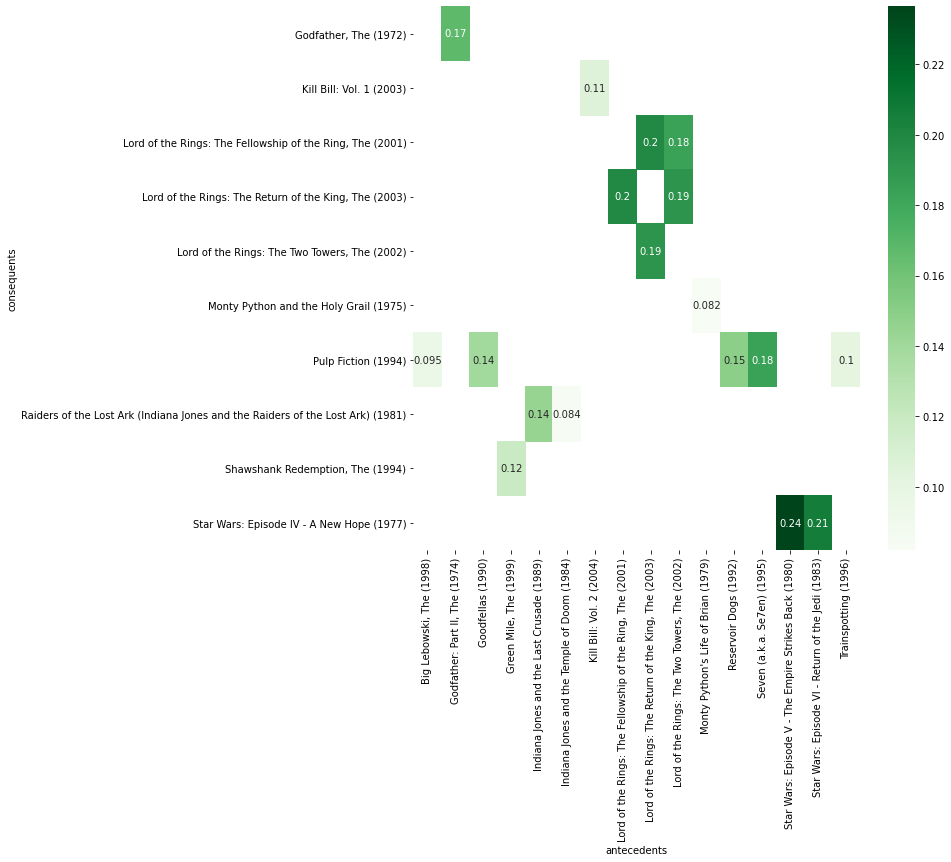

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(support_table, annot=True,cmap="Greens");


>**Based on the heatmap, we identify a narrow set of movies that might provide a good starting point for the streaming service, maybe?**

### Scatter Plot

In [74]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns

In [71]:
onehot

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),...,Zombieland (2009),Zookeeper (2011),Zoolander (2001),Zootopia (2016),Zulu (1964),[REC] (2007),[REC]² (2009),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
605,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
606,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
607,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
#Apply apriori algorithm
frequent_itemsets=apriori(onehot,min_support=0.01,use_colnames=True,max_len=2)

#Recover the association rules
rules=association_rules(frequent_itemsets)

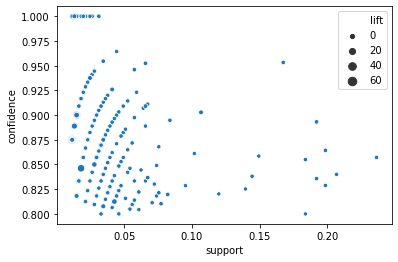

In [78]:
sns.scatterplot(x='support',y='confidence',size='lift',data=rules);